In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv("Covid Data.csv")

In [3]:
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [5]:
# df["death_status"] = ["Alive" if date == "9999-99-99" else "Dead" for date in df.DATE_DIED]

In [6]:
df["death"] = [0 if date == "9999-99-99" else 1 for date in df.DATE_DIED]

<font color="orange"> USMER : Indicates whether the patient treated medical units of the first, second or third level. 

In [7]:
df.USMER.value_counts()

2    662903
1    385672
Name: USMER, dtype: int64

C:\Users\MERVE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='USMER', ylabel='count'>

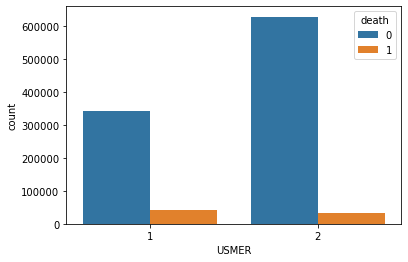

In [8]:
sns.countplot("USMER",hue="death",data=df)

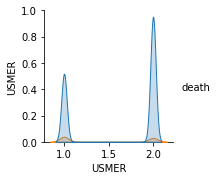

In [9]:
sns.pairplot(df[["USMER","death"]],hue="death")

In [10]:
u1_d = len(df[(df.USMER == 1) & (df.death == 1)])
u1_a = len(df[(df.USMER == 1) & (df.death == 0)])
u2_d = len(df[(df.USMER == 2) & (df.death == 1)])
u2_a = len(df[(df.USMER == 2) & (df.death == 0)])

In [11]:
print(f"1. merkezdekilerin yüzde kaçı yaşıyor:{100*(u1_a/(u1_d+u1_a))}")
print(f"2. merkezdekilerin yüzde kaçı yaşıyor:{100*(u2_a/(u2_d+u2_a))}")

1. merkezdekilerin yüzde kaçı yaşıyor:88.8104399593437
2. merkezdekilerin yüzde kaçı yaşıyor:94.90317587942731


<font color="orange"> MEDICAL UNIT: type of institution of the National Health System that provided the care.

In [12]:
df.MEDICAL_UNIT.value_counts()

12    602995
4     314405
6      40584
9      38116
3      19175
8      10399
10      7873
5       7244
11      5577
13       996
7        891
2        169
1        151
Name: MEDICAL_UNIT, dtype: int64

C:\Users\MERVE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MEDICAL_UNIT', ylabel='count'>

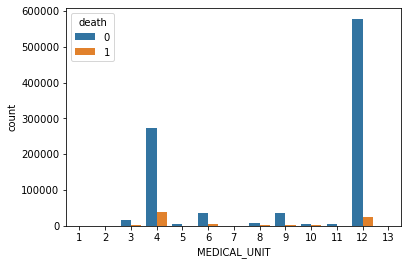

In [13]:
sns.countplot("MEDICAL_UNIT",hue="death",data=df)

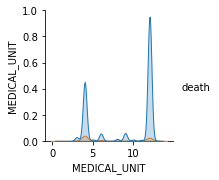

In [14]:
sns.pairplot(df[["MEDICAL_UNIT","death"]],hue="death")

<font color="blue"> Bu sütünun 1,2,3.. veya 13 olması arasındaki farkı çözemedim. Ondan dolayı bu sütunu analize dahil etmemeyi düşünüyorum.

<font color="orange"> SEX: 1 for female and 2 for male.

In [15]:
df.SEX.value_counts()

1    525064
2    523511
Name: SEX, dtype: int64

C:\Users\MERVE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SEX', ylabel='count'>

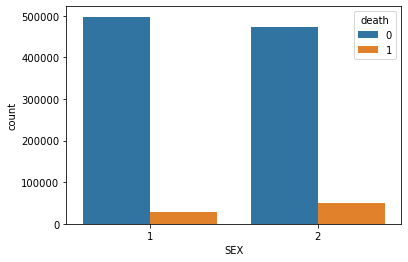

In [16]:
sns.countplot("SEX",hue="death",data=df)

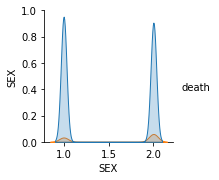

In [17]:
sns.pairplot(df[["SEX","death"]],hue="death")

In [18]:
df.SEX =df.SEX.replace(1,"F").replace(2,"M")

<font color="ORANGE"> PATIENT TYPE: type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.

In [19]:
df.PATIENT_TYPE. value_counts()

1    848544
2    200031
Name: PATIENT_TYPE, dtype: int64

C:\Users\MERVE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PATIENT_TYPE', ylabel='count'>

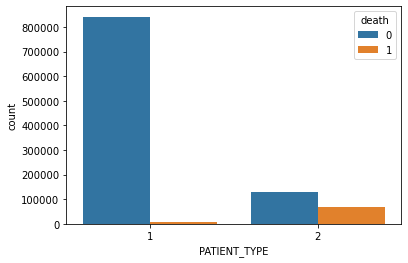

In [20]:
sns.countplot("PATIENT_TYPE",hue="death",data=df)

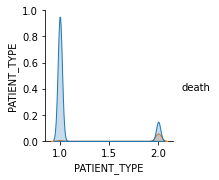

In [21]:
sns.pairplot(df[["PATIENT_TYPE","death"]],hue="death")

<font color =" blue" > Evde tedaviye devam edenler bir olarak kalsın, hastanede tedavi olanları 0 yapıyorum. Böylece bu sütunu da sayısal olarak tutabileceğim.

In [22]:
df.PATIENT_TYPE = df.PATIENT_TYPE.replace(2,0)

<font color="orange"> INTUBED: whether the patient was connected to the ventilator.

In [23]:
df.INTUBED.value_counts(normalize=True)

97    0.809235
2     0.151682
1     0.032097
99    0.006986
Name: INTUBED, dtype: float64

C:\Users\MERVE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='INTUBED', ylabel='count'>

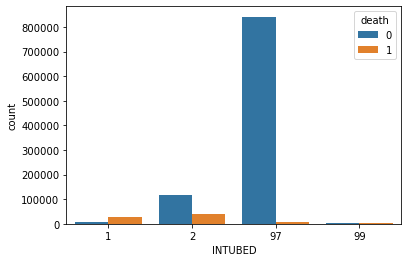

In [24]:
sns.countplot("INTUBED",hue="death",data=df)

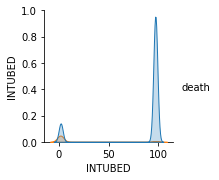

In [25]:
sns.pairplot(df[["INTUBED","death"]],hue="death")

In [26]:
df.INTUBED = df.INTUBED.replace([97,99],np.NaN).replace(2,0)

<font color="red"> Entübe hastalarda çok fazla bilinmeyen değer var. Yüzde seksenden fazla bilinmeyen değeğr olduğu için mod medyan kullanmak mantıklı gelmediği için bu sütunu kaldıracağım.

<font color="orange"> PNEUMONIA: whether the patient already have air sacs inflammation or not.

In [27]:
df.PNEUMONIA.value_counts()

2     892534
1     140038
99     16003
Name: PNEUMONIA, dtype: int64

C:\Users\MERVE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


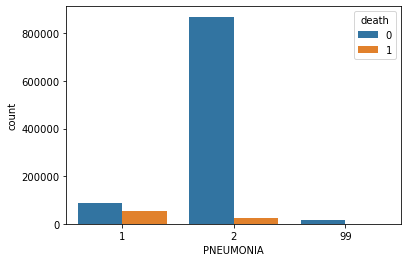

In [28]:
sns.countplot("PNEUMONIA",hue="death",data=df);

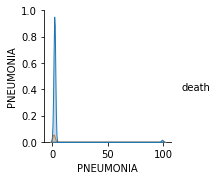

In [29]:
sns.pairplot(df[["PNEUMONIA","death"]],hue="death")

In [30]:
df.PNEUMONIA = df.PNEUMONIA.replace([99,2],[np.NaN,0])

<font color="orange"> AGE

In [31]:
df.AGE.value_counts()

30     27010
31     25927
28     25313
29     25134
34     24872
       ...  
115        2
114        2
113        1
111        1
121        1
Name: AGE, Length: 121, dtype: int64

C:\Users\MERVE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AGE', ylabel='count'>

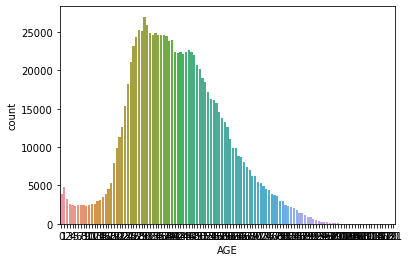

In [32]:
sns.countplot("AGE",data=df)

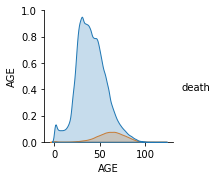

In [33]:
sns.pairplot(df[["AGE","death"]],hue="death")

In [34]:
df["age_new"] = [1 if 0 <= age & age <= 40 else (2 if 41 <= age & age <= 80 else 3) for age in df.AGE]

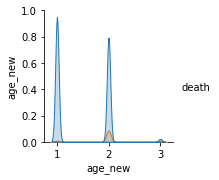

In [35]:
sns.pairplot(df[["age_new","death"]],hue = "death")

<font color="orange"> PREGNANT

In [36]:
df.PREGNANT.value_counts()

97    523511
2     513179
1       8131
98      3754
Name: PREGNANT, dtype: int64

In [37]:
df[df["PREGNANT"] == 98].SEX.unique()

array(['F'], dtype=object)

In [38]:
df.PREGNANT = df.PREGNANT.replace(98,np.NaN)

In [39]:
df[df["PREGNANT"] == 97].SEX.unique()

array(['M'], dtype=object)

<font color="blue"> Hamile olup olmadığı bilinmeyen, 97 atanmış hastaların hepsi erkek. Bunarın hepsine 2 atayarak hamile olmadıklarını belirtebiliriz.

In [40]:
df.PREGNANT = df.PREGNANT.replace([97],[2])

In [41]:
df.PREGNANT = df.PREGNANT.replace(2,0)

C:\Users\MERVE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PREGNANT', ylabel='count'>

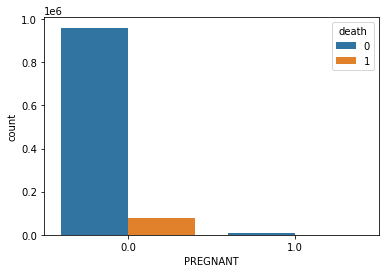

In [42]:
sns.countplot("PREGNANT",hue="death",data=df)

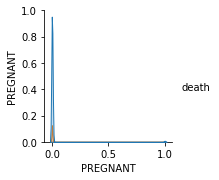

In [43]:
sns.pairplot(df[["PREGNANT","death"]],hue="death")

<font color="orange"> DIABETES: whether the patient has diabetes or not.

In [44]:
df.DIABETES.value_counts()

2     920248
1     124989
98      3338
Name: DIABETES, dtype: int64

In [45]:
df.DIABETES = df.DIABETES.replace([98,2],[np.NaN,0])

C:\Users\MERVE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DIABETES', ylabel='count'>

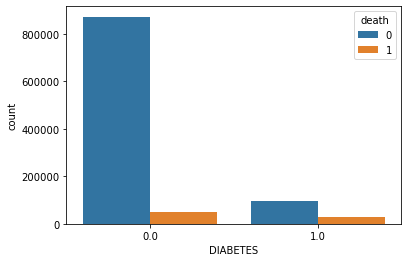

In [46]:
sns.countplot("DIABETES",hue="death",data=df)

<font color="orange"> COPD: Indicates whether the patient has Chronic obstructive pulmonary disease or not.

In [47]:
df.COPD.value_counts()

2     1030510
1       15062
98       3003
Name: COPD, dtype: int64

In [48]:
df.COPD = df.COPD.replace([98,2],[np.NaN,0])

C:\Users\MERVE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='COPD', ylabel='count'>

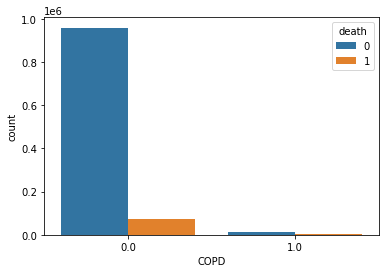

In [49]:
sns.countplot("COPD",hue="death",data=df)

<font color="orange"> ASTHMA: whether the patient has asthma or not.

In [50]:
df.ASTHMA.value_counts()

2     1014024
1       31572
98       2979
Name: ASTHMA, dtype: int64

In [51]:
df.ASTHMA = df.ASTHMA.replace([98,2],[np.NaN,0])

C:\Users\MERVE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ASTHMA', ylabel='count'>

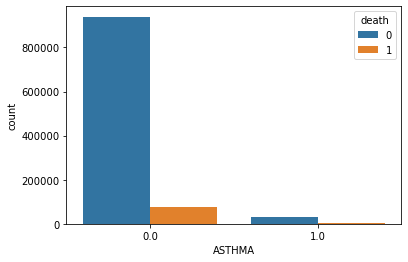

In [52]:
sns.countplot("ASTHMA",hue="death",data=df)

<font color="orange"> INMSUPR: whether the patient is immunosuppressed or not.

In [53]:
df.INMSUPR.value_counts()

2     1031001
1       14170
98       3404
Name: INMSUPR, dtype: int64

In [54]:
df.INMSUPR = df.INMSUPR.replace([98,2],[np.NaN,0])

C:\Users\MERVE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='INMSUPR', ylabel='count'>

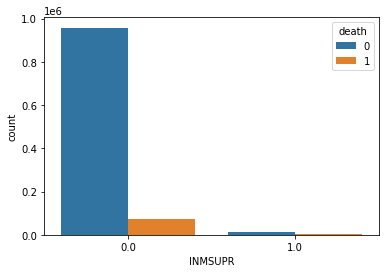

In [55]:
sns.countplot("INMSUPR",hue="death",data=df)

<font color="orange"> HIPERTENSION: whether the patient has hypertension or not.

In [56]:
df.HIPERTENSION.value_counts()

2     882742
1     162729
98      3104
Name: HIPERTENSION, dtype: int64

In [57]:
df.HIPERTENSION = df.HIPERTENSION.replace([98,2],[np.NaN,0])

C:\Users\MERVE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HIPERTENSION', ylabel='count'>

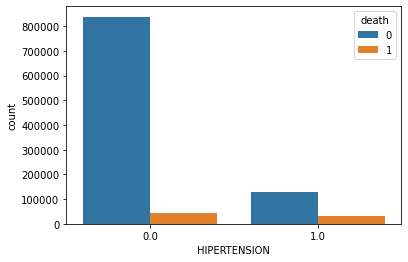

In [58]:
sns.countplot("HIPERTENSION",hue="death",data=df)

<font color="orange"> OTHER_DISEASE: whether the patient has other disease or not.

In [59]:
df.OTHER_DISEASE.value_counts()

2     1015490
1       28040
98       5045
Name: OTHER_DISEASE, dtype: int64

In [60]:
df.OTHER_DISEASE = df.OTHER_DISEASE.replace([98,2],[np.NaN,0])

C:\Users\MERVE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='OTHER_DISEASE', ylabel='count'>

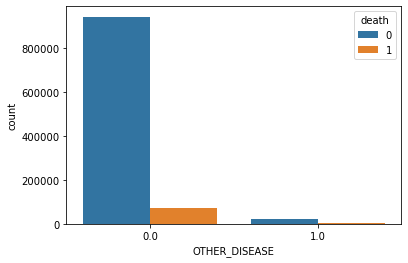

In [61]:
sns.countplot("OTHER_DISEASE",hue="death",data=df)

<font color="orange"> CARDIOVASCULAR: whether the patient has heart or blood vessels related disease.

In [62]:
df.CARDIOVASCULAR.value_counts()

2     1024730
1       20769
98       3076
Name: CARDIOVASCULAR, dtype: int64

In [63]:
df.CARDIOVASCULAR = df.CARDIOVASCULAR.replace([98,2],[np.NaN,0])

C:\Users\MERVE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CARDIOVASCULAR', ylabel='count'>

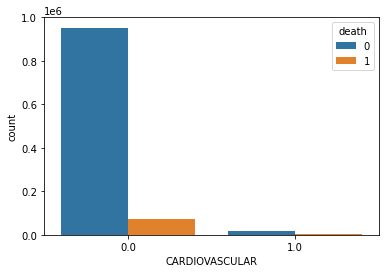

In [64]:
sns.countplot("CARDIOVASCULAR",hue="death",data=df)

<font color="orange"> OBESITY: whether the patient is obese or not.

In [65]:
df.OBESITY.value_counts()

2     885727
1     159816
98      3032
Name: OBESITY, dtype: int64

In [66]:
df.OBESITY = df.OBESITY.replace([98,2],[np.NaN,0])

C:\Users\MERVE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='OBESITY', ylabel='count'>

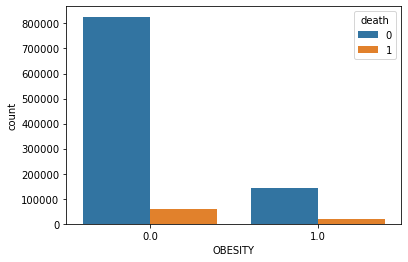

In [67]:
sns.countplot("OBESITY",hue="death",data=df)

<font color="orange"> RENAL_CHRONIC: whether the patient has chronic renal disease or not.

In [68]:
df.RENAL_CHRONIC.value_counts()

2     1026665
1       18904
98       3006
Name: RENAL_CHRONIC, dtype: int64

In [69]:
df.RENAL_CHRONIC = df.RENAL_CHRONIC.replace([98,2],[np.NaN,0])

C:\Users\MERVE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RENAL_CHRONIC', ylabel='count'>

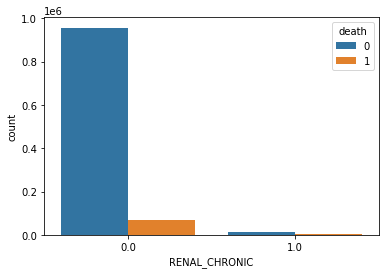

In [70]:
sns.countplot("RENAL_CHRONIC",hue="death",data=df)

<font color="orange"> TOBACCO: whether the patient is a tobacco user.

In [71]:
df.TOBACCO.value_counts()

2     960979
1      84376
98      3220
Name: TOBACCO, dtype: int64

In [72]:
df.TOBACCO = df.TOBACCO.replace([98,2],[np.NaN,0])

C:\Users\MERVE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TOBACCO', ylabel='count'>

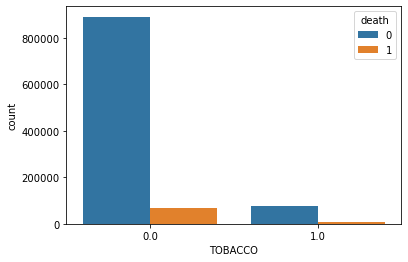

In [73]:
sns.countplot("TOBACCO",hue="death",data=df)

<font color="orange"> CLASIFFICATION_FINAL: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.

In [74]:
df.CLASIFFICATION_FINAL.value_counts()

7    499250
3    381527
6    128133
5     26091
1      8601
4      3122
2      1851
Name: CLASIFFICATION_FINAL, dtype: int64

In [75]:
df["classification"] = ["P" if classification in [1,2,3] else "N" for classification in df.CLASIFFICATION_FINAL]

C:\Users\MERVE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='classification', ylabel='count'>

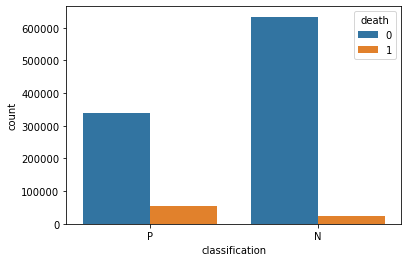

In [76]:
sns.countplot("classification",hue="death",data=df)

<font color="orange"> ICU: Indicates whether the patient had been admitted to an Intensive Care Unit.

In [77]:
df.ICU.value_counts()

97    848544
2     175685
1      16858
99      7488
Name: ICU, dtype: int64

<font color="blue"> Entübe olan her hasta yoğun bakımdadır ama her yoğun bakımdaki entübe değildir.

In [78]:
df[df["ICU"] == 97].INTUBED.unique()

array([nan])

In [79]:
df[df["ICU"] == 99].INTUBED.unique()

array([nan,  1.,  0.])

In [80]:
for ix in df[(df["ICU"] == 99 ) & (df["INTUBED"] == 1)].index:
    df.ICU.iloc[ix] = 1

C:\Users\MERVE\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [81]:
df.ICU = df.ICU.replace([97,99],np.NaN)

C:\Users\MERVE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ICU', ylabel='count'>

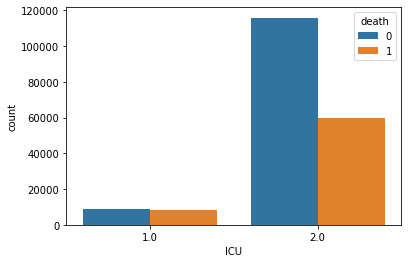

In [82]:
sns.countplot("ICU",hue="death",data=df)

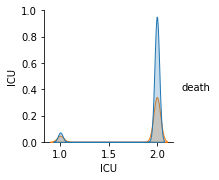

In [83]:
sns.pairplot(df[["ICU","death"]],hue="death")

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 24 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   USMER                 1048575 non-null  int64  
 1   MEDICAL_UNIT          1048575 non-null  int64  
 2   SEX                   1048575 non-null  object 
 3   PATIENT_TYPE          1048575 non-null  int64  
 4   DATE_DIED             1048575 non-null  object 
 5   INTUBED               192706 non-null   float64
 6   PNEUMONIA             1032572 non-null  float64
 7   AGE                   1048575 non-null  int64  
 8   PREGNANT              1044821 non-null  float64
 9   DIABETES              1045237 non-null  float64
 10  COPD                  1045572 non-null  float64
 11  ASTHMA                1045596 non-null  float64
 12  INMSUPR               1045171 non-null  float64
 13  HIPERTENSION          1045471 non-null  float64
 14  OTHER_DISEASE         1043530 non-

<AxesSubplot:>

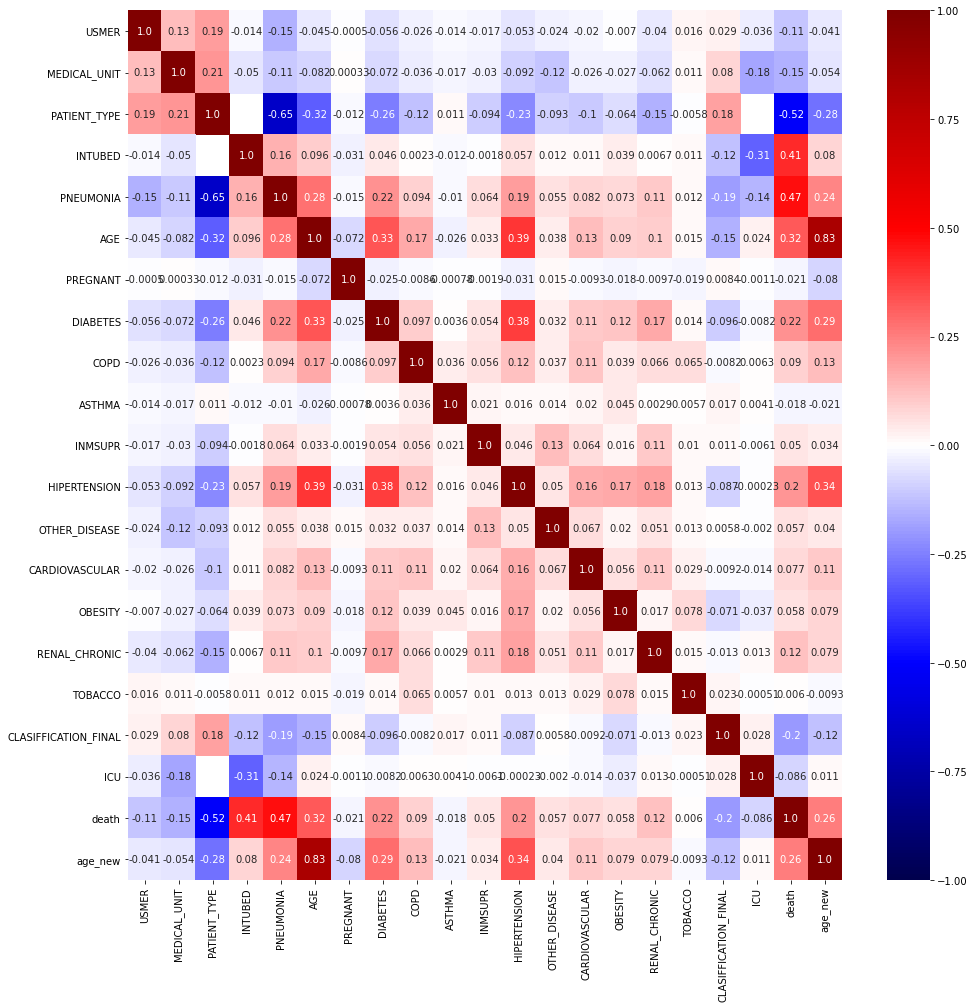

In [85]:
plt.figure(figsize=[16,16])
sns.heatmap(df.corr(), annot = True, vmin = -1, vmax = 1, cmap= "seismic",fmt=".2")

<font color ="blue"> ICU ve INTUBED null değerleri çok fazla bu iki sütundan vazgeçiyorum.

In [86]:
df.drop(["ICU","INTUBED","AGE","DATE_DIED","CLASIFFICATION_FINAL"],axis=1,inplace=True)

In [87]:
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,PNEUMONIA,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,death,age_new,classification
0,2,1,F,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,2,P
1,2,1,M,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1,2,N
2,2,1,M,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2,P
3,2,1,F,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2,N
4,2,1,M,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,2,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,M,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,N
1048571,1,13,M,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,2,N
1048572,2,13,M,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2,N
1048573,2,13,M,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,N


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 19 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   USMER           1048575 non-null  int64  
 1   MEDICAL_UNIT    1048575 non-null  int64  
 2   SEX             1048575 non-null  object 
 3   PATIENT_TYPE    1048575 non-null  int64  
 4   PNEUMONIA       1032572 non-null  float64
 5   PREGNANT        1044821 non-null  float64
 6   DIABETES        1045237 non-null  float64
 7   COPD            1045572 non-null  float64
 8   ASTHMA          1045596 non-null  float64
 9   INMSUPR         1045171 non-null  float64
 10  HIPERTENSION    1045471 non-null  float64
 11  OTHER_DISEASE   1043530 non-null  float64
 12  CARDIOVASCULAR  1045499 non-null  float64
 13  OBESITY         1045543 non-null  float64
 14  RENAL_CHRONIC   1045569 non-null  float64
 15  TOBACCO         1045355 non-null  float64
 16  death           1048575 non-null  in

In [89]:
df.dropna(inplace=True)

In [90]:
df.drop(["MEDICAL_UNIT"],axis=1,inplace=True)

In [91]:
df = pd.get_dummies(df,columns = ["USMER","SEX","PATIENT_TYPE","PNEUMONIA","PREGNANT","DIABETES","COPD","ASTHMA","INMSUPR",
                                  "HIPERTENSION","OTHER_DISEASE","CARDIOVASCULAR","OBESITY","RENAL_CHRONIC","TOBACCO",
                                  "classification"],drop_first = True)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1021977 entries, 0 to 1048574
Data columns (total 18 columns):
 #   Column              Non-Null Count    Dtype
---  ------              --------------    -----
 0   death               1021977 non-null  int64
 1   age_new             1021977 non-null  int64
 2   USMER_2             1021977 non-null  uint8
 3   SEX_M               1021977 non-null  uint8
 4   PATIENT_TYPE_1      1021977 non-null  uint8
 5   PNEUMONIA_1.0       1021977 non-null  uint8
 6   PREGNANT_1.0        1021977 non-null  uint8
 7   DIABETES_1.0        1021977 non-null  uint8
 8   COPD_1.0            1021977 non-null  uint8
 9   ASTHMA_1.0          1021977 non-null  uint8
 10  INMSUPR_1.0         1021977 non-null  uint8
 11  HIPERTENSION_1.0    1021977 non-null  uint8
 12  OTHER_DISEASE_1.0   1021977 non-null  uint8
 13  CARDIOVASCULAR_1.0  1021977 non-null  uint8
 14  OBESITY_1.0         1021977 non-null  uint8
 15  RENAL_CHRONIC_1.0   1021977 non-null  uint8
 16  

<AxesSubplot:>

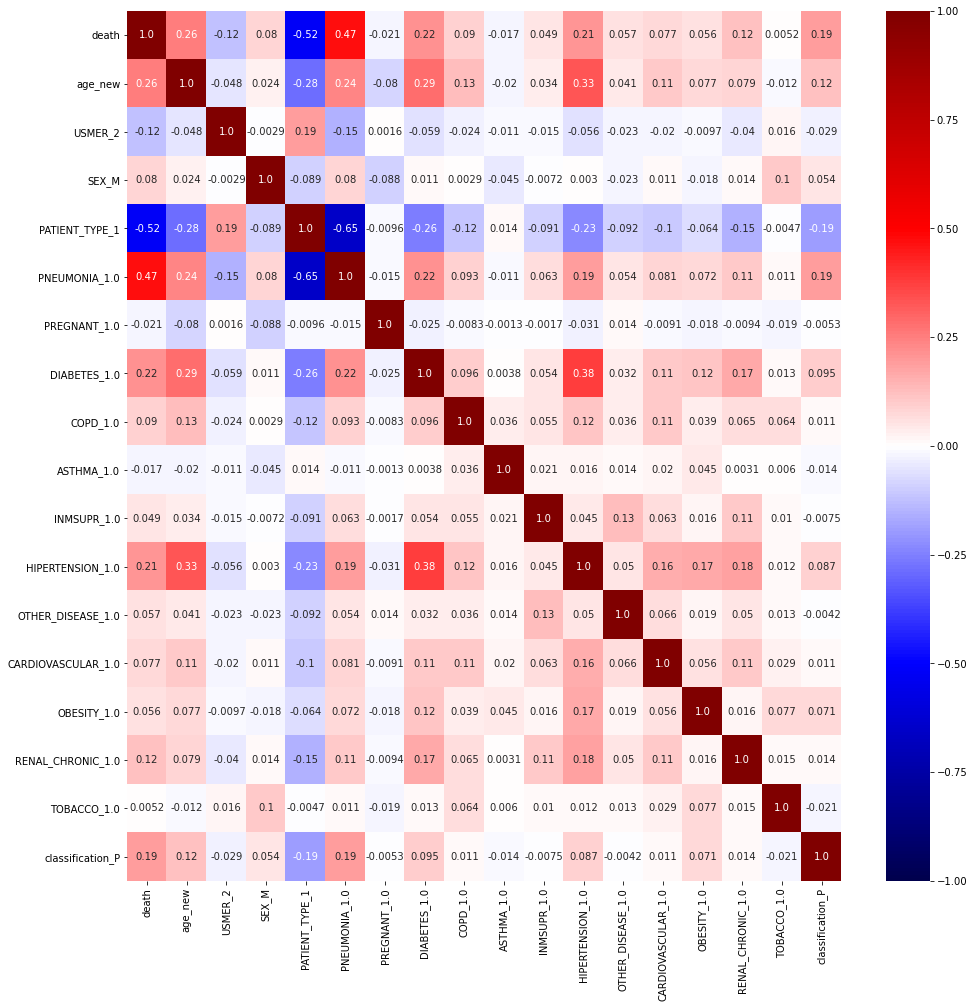

In [93]:
plt.figure(figsize=[16,16])
sns.heatmap(df.corr(), annot = True, vmin = -1, vmax = 1, cmap= "seismic",fmt=".2")

In [94]:
df

,death,age_new,USMER_2,SEX_M,PATIENT_TYPE_1,PNEUMONIA_1.0,PREGNANT_1.0,DIABETES_1.0,COPD_1.0,ASTHMA_1.0,INMSUPR_1.0,HIPERTENSION_1.0,OTHER_DISEASE_1.0,CARDIOVASCULAR_1.0,OBESITY_1.0,RENAL_CHRONIC_1.0,TOBACCO_1.0,classification_P
0,1,2,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1
1,1,2,1,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0
2,1,2,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,1,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,2,1,1,1,0,0,1,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1048571,0,2,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1048572,0,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1048573,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [95]:
df.to_csv("covid_with_dummies.csv")